<a href="https://colab.research.google.com/github/Mik1810/AI-assignment/blob/main/AI_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29413 sha256=b972c323257d6b835e82e4dbbe79058f9dbc63270051d31efa3b956f6dec37fa
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


In [ ]:
!pip install yfinance

In [ ]:
!pip install quantstats

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 1.2 MB/s eta 0:00:00


In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.2 MB/s eta 0:00:00


In [ ]:
!pip install IPython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 7.2 MB/s eta 0:00:00


In [ ]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.7 MB/s eta 0:00:00


In [ ]:
# Importing Libraries

# Data Handling
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.ticker as mtick
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

# Financial Data Analysis
import yfinance as yf
import ta
import quantstats as qs

# Machine Learning Metrics
from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix

# Models
from sklearn.linear_model import LinearRegression, Ridge
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

# Feature Selection
from sklearn.feature_selection import SelectKBest, f_regression

# Feature Importance
from sklearn.inspection import permutation_importance

# Hyperparameter Tuning
import optuna

# Hiding warnings
import warnings
warnings.filterwarnings("ignore")

In [14]:
brk = yf.download('BRK-B')
brk

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1996-05-09,22.200001,24.400000,22.200001,23.200001,23.200001,4290000
1996-05-10,24.000000,24.200001,23.600000,24.000000,24.000000,1060000
1996-05-13,24.000000,24.100000,23.299999,23.900000,23.900000,700000
1996-05-14,24.000000,24.100000,23.100000,23.600000,23.600000,310000
1996-05-15,23.600000,23.700001,23.000000,23.200001,23.200001,545000
...,...,...,...,...,...,...
2023-12-18,357.420013,361.140015,357.000000,359.649994,359.649994,4526400
2023-12-19,360.149994,362.549988,359.089996,361.799988,361.799988,3084600
2023-12-20,361.519989,361.660004,355.119995,355.350006,355.350006,3926700


In [15]:
# Creating a Candlestick chart for Berkshire Hathaway stocks
candlestick = go.Candlestick(x=brk.index,
                open=brk['Open'],
                high=brk['High'],
                low=brk['Low'],
                close=brk['Adj Close'],
                increasing=dict(line=dict(color='black')),
                decreasing=dict(line=dict(color='red')),
                showlegend=False)

# Layout
layout = go.Layout(
    title='Adjusted Berkshire Hathaway Class B Shares Price - 1996 to 2023',
    yaxis=dict(title='Price (USD)'),
    xaxis=dict(title='Date'),
    template = 'ggplot2',
    xaxis_rangeslider_visible=False,
    yaxis_gridcolor='white',
    xaxis_gridcolor='white',
    yaxis_tickfont=dict(color='black'),
    xaxis_tickfont=dict(color='black'),
    margin=dict(t=50,l=50,r=50,b=50)
)

fig = go.Figure(data=[candlestick], layout=layout)

# Plotting annotation
fig.add_annotation(text='Berkshire Hathaway Class B (BRK-B)',
                    font=dict(color='gray', size=30),
                    xref='paper', yref='paper',
                    x=0.5, y=0.5,
                    showarrow=False,
                    opacity=.85)

fig.show(renderer="colab")

In [16]:
train = brk[brk.index.year <= 2016]
test = brk[brk.index.year >= 2017]

In [17]:
# Visualizing the training set from 1996 to 2016
train

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1996-05-09,22.200001,24.400000,22.200001,23.200001,23.200001,4290000
1996-05-10,24.000000,24.200001,23.600000,24.000000,24.000000,1060000
1996-05-13,24.000000,24.100000,23.299999,23.900000,23.900000,700000
1996-05-14,24.000000,24.100000,23.100000,23.600000,23.600000,310000
1996-05-15,23.600000,23.700001,23.000000,23.200001,23.200001,545000
...,...,...,...,...,...,...
2016-12-23,166.259995,166.440002,164.770004,165.320007,165.320007,2043100
2016-12-27,165.509995,165.820007,164.779999,164.949997,164.949997,2133800
2016-12-28,165.449997,165.639999,163.559998,163.750000,163.750000,2626800


In [18]:
test

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,164.339996,164.710007,162.440002,163.830002,163.830002,4091000
2017-01-04,164.449997,164.570007,163.000000,164.080002,164.080002,3568900
2017-01-05,164.059998,164.139999,162.179993,163.300003,163.300003,2982500
2017-01-06,163.440002,163.800003,162.639999,163.410004,163.410004,2697000
2017-01-09,163.039993,163.250000,162.020004,162.020004,162.020004,3564700
...,...,...,...,...,...,...
2023-12-18,357.420013,361.140015,357.000000,359.649994,359.649994,4526400
2023-12-19,360.149994,362.549988,359.089996,361.799988,361.799988,3084600
2023-12-20,361.519989,361.660004,355.119995,355.350006,355.350006,3926700


In [19]:
# Defining feature creation function
def feature_engineering(df):

    # Price behavior features
    df['high_low_ratio'] = df['High'] / df['Low']
    df['open_adjclose_ratio'] = df['Open'] / df['Adj Close']
    df['candle_to_wick_ratio'] = (df['Adj Close'] - df['Open']) / (df['High'] - df['Low'])
    df['candle_to_wick_ratio'] = df['candle_to_wick_ratio'].replace([np.inf, -np.inf], 0)

    # Lagged values
    df['Close_lag1'] = df['Adj Close'].shift(1)
    df['Close_lag2'] = df['Adj Close'].shift(2)
    df['Close_lag3'] = df['Adj Close'].shift(3)
    df['Close_lag5'] = df['Adj Close'].shift(5)

    # Close to lags ratio
    df['Close_lag1_ratio'] = df['Adj Close'] / df['Close_lag1']
    df['Close_lag2_ratio'] = df['Adj Close'] / df['Close_lag2']
    df['Close_lag3_ratio'] = df['Adj Close'] / df['Close_lag3']
    df['Close_lag5_ratio'] = df['Adj Close'] / df['Close_lag5']

    # Simple moving averages
    df['sma10'] = ta.trend.sma_indicator(df['Adj Close'], window = 10)
    df['sma20'] = ta.trend.sma_indicator(df['Adj Close'], window = 20)
    df['sma80'] = ta.trend.sma_indicator(df['Adj Close'], window = 80)
    df['sma100'] = ta.trend.sma_indicator(df['Adj Close'], window = 100)

    # Close to averages ratio
    df['Close_sma10_ratio'] = df['Adj Close'] / df['sma10']
    df['Close_sma20_ratio'] = df['Adj Close'] / df['sma20']
    df['Close_sma80_ratio'] = df['Adj Close'] / df['sma80']
    df['Close_sma100_ratio'] = df['Adj Close'] / df['sma100']


    # Shorter SMA to longer SMA ratio
    df['sma10_sma20_ratio'] = df['sma10'] / df['sma20']
    df['sma20_sma80_ratio'] = df['sma20'] / df['sma80']
    df['sma80_sma100_ratio'] = df['sma80'] / df['sma100']
    df['sma10_sma80_ratio'] = df['sma10'] / df['sma80']
    df['sma20_sma100_ratio'] = df['sma20'] / df['sma100']

    # Classical technical indicators
    df['rsi'] = ta.momentum.RSIIndicator(df['Adj Close']).rsi()
    df['rsi_overbought'] = (df['rsi'] >= 70).astype(int)
    df['rsi_oversold'] = (df['rsi'] <= 30).astype(int)
    df['cci'] = ta.trend.cci(df['High'], df['Low'], df['Adj Close'], window=20, constant=0.015)
    df['obv'] = ta.volume.OnBalanceVolumeIndicator(close=df['Adj Close'], volume=df['Volume']).on_balance_volume()
    df['obv_divergence_10_days'] = df['obv'].diff().rolling(10).sum() - df['Adj Close'].diff().rolling(10).sum()
    df['obv_divergence_20_days'] = df['obv'].diff().rolling(20).sum() - df['Adj Close'].diff().rolling(20).sum()

    # Daily returns in %
    df['returns_in_%'] = np.round((df['Adj Close'].pct_change()) * 100, 2)

    # Target variable – Daily returns shifted to a day earlier
    df['target'] = df['returns_in_%'].shift(-1)

    # Remove null values
    df.dropna(inplace = True)
    return df  # Return data frame with the new features above

Si potrebbe pensare di usare, oltre che la media mobile, anche la media mobile esponenziale


In [23]:
# Applying the function above to the train and test sets
train = feature_engineering(train)
test = feature_engineering(test)

In [24]:
train # Visualizing results

,Open,High,Low,Close,Adj Close,Volume,high_low_ratio,open_adjclose_ratio,candle_to_wick_ratio,Close_lag1,...,sma20_sma100_ratio,rsi,rsi_overbought,rsi_oversold,cci,obv,obv_divergence_10_days,obv_divergence_20_days,returns_in_%,target
Date,,,,,,,,,,,,,,,,,,,,,
1997-02-20,24.320000,24.320000,23.900000,24.040001,24.040001,140000,1.017573,1.011647,-0.666664,24.120001,...,1.059862,60.253820,0,0,65.228143,1890000,4.899996e+05,8.099992e+05,-0.33,0.33
1997-02-21,24.000000,24.240000,23.940001,24.120001,24.120001,45000,1.012531,0.995025,0.400004,24.040001,...,1.060795,61.435200,0,0,60.934121,1935000,6.099995e+05,9.599990e+05,0.33,-0.25
1997-02-24,24.059999,24.120001,24.000000,24.059999,24.059999,55000,1.005000,1.000000,0.000000,24.120001,...,1.062142,59.994862,0,0,50.468226,1880000,4.449999e+05,1.089999e+06,-0.25,0.50
1997-02-25,24.120001,24.180000,24.059999,24.180000,24.180000,35000,1.004988,0.997519,0.499992,24.059999,...,1.064095,61.917850,0,0,56.860890,1915000,4.099998e+05,1.284999e+06,0.50,-0.58
1997-02-26,24.200001,24.240000,24.040001,24.040001,24.040001,40000,1.008319,1.006656,-0.800004,24.180000,...,1.065654,58.391412,0,0,47.117062,1875000,4.499999e+05,1.089999e+06,-0.58,-0.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-21,166.399994,166.669998,165.550003,165.949997,165.949997,2480500,1.006765,1.002712,-0.401785,166.360001,...,1.080211,69.811831,0,0,76.083902,594827000,6.101199e+06,1.363249e+07,-0.25,0.05
2016-12-22,165.770004,166.119995,164.889999,166.029999,166.029999,2511600,1.007459,0.998434,0.211378,165.949997,...,1.081211,69.999671,0,0,62.915292,597338600,1.351530e+07,1.919479e+07,0.05,-0.43
2016-12-23,166.259995,166.440002,164.770004,165.320007,165.320007,2043100,1.010135,1.005686,-0.562867,166.029999,...,1.082023,66.070528,0,0,54.960756,595295500,7.584300e+06,1.537449e+07,-0.43,-0.22


In [46]:
X_train = train.drop('target', axis = 1) # Independent features X
y_train = train.target # target variable y

X_test = test.drop('target', axis = 1) # Independent features X
y_test = test.target # target variable y

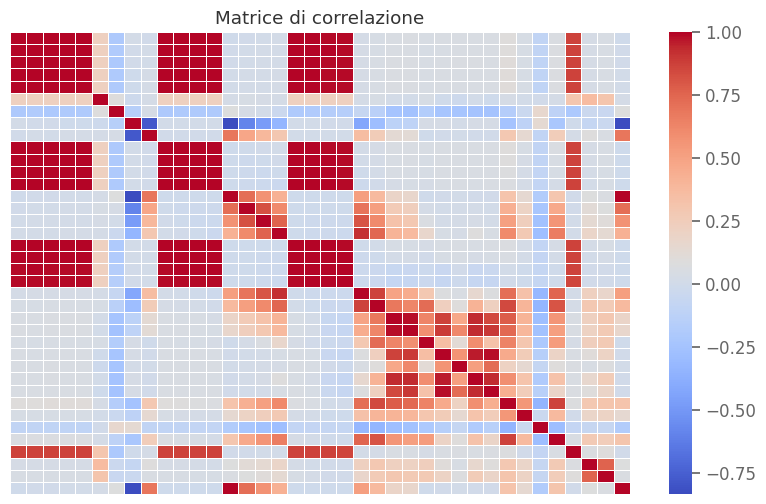

In [33]:
# Calcola i coefficienti di correlazione
correlation_matrix = X_train.corr()

plt.figure()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5, xticklabels=False, yticklabels=False)
plt.title('Matrice di correlazione')
plt.show()

In [34]:
# Initiating SelectKBest using f_regression as score function
k_best = SelectKBest(score_func = f_regression, k = 38)

# Fitting and transforming
X_train_kbest = k_best.fit_transform(X_train, y_train)
X_test_kbest = k_best.transform(X_test)

# Obtaining indices and feature names
feature_indices = k_best.get_support(indices = True)
feature_names = X_train.columns[feature_indices]

# Obtaining p-values
p_values = k_best.pvalues_

# Creating features list
features = []

# Selecting only features with p-values below 0.2
for feature, pvalue in zip(feature_names, p_values):
    if pvalue < 0.2:
        features.append(feature)

# Printing features
print("Selected Features:")
print(features)

Selected Features:
['high_low_ratio', 'open_adjclose_ratio', 'Close_lag1_ratio', 'Close_lag5_ratio', 'Close_sma10_ratio', 'Close_sma20_ratio', 'Close_sma80_ratio', 'Close_sma100_ratio', 'sma10_sma20_ratio', 'sma10_sma80_ratio', 'rsi', 'rsi_oversold', 'cci', 'returns_in_%']


In [35]:
# Creating new X datasets containing only the selected features
X_train_kbest = X_train[features]
X_test_kbest = X_test[features]

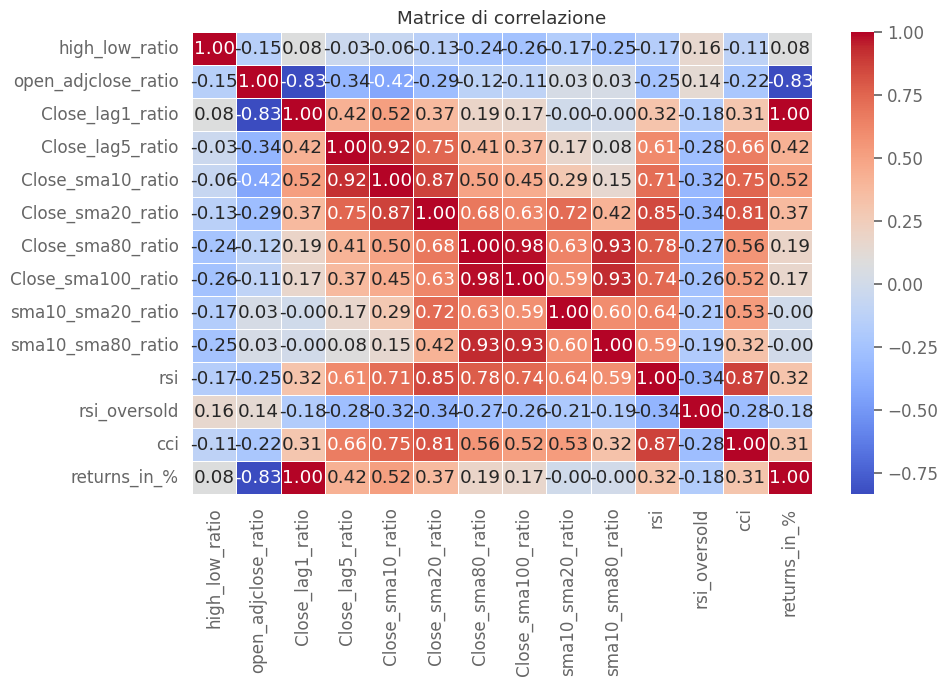

In [39]:
correlation_matrix = X_train_kbest.corr()

plt.figure()
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5, xticklabels=True, yticklabels=True)
plt.title('Matrice di correlazione')
plt.show()

In [43]:
def spearman_score(X, y):
    _, p_values = spearmanr(X, y)
    return -np.log10(p_values)

In [42]:
X_train_kbest[['Close_lag1_ratio', 'returns_in_%']]

,Close_lag1_ratio,returns_in_%
Date,,
1997-02-20,0.996683,-0.33
1997-02-21,1.003328,0.33
1997-02-24,0.997512,-0.25
1997-02-25,1.004988,0.50
1997-02-26,0.994210,-0.58
...,...,...
2016-12-21,0.997535,-0.25
2016-12-22,1.000482,0.05
2016-12-23,0.995724,-0.43


In [55]:
# Best Features
regressors = [
    LinearRegression(),
    Ridge(random_state = 42),
    ExtraTreesRegressor(random_state = 42),
    GradientBoostingRegressor(random_state = 42),
    KNeighborsRegressor(),
    XGBRegressor(random_state = 42),
    LGBMRegressor(random_state = 42),
    CatBoostRegressor(random_state = 42, verbose = False),
    AdaBoostRegressor(random_state = 42),
    RandomForestRegressor(random_state = 42)
]

# Iterating over algorithms and printing scores
for reg in regressors:
    reg.fit(X_train_kbest, y_train)
    y_pred = reg.predict(X_test_kbest)
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared = False)
    print(f'{type(reg).__name__}: R² = {r2:.2f}, Root Mean Squared Error = {rmse:.2f}')

LinearRegression: R² = -0.01, Root Mean Squared Error = 1.34
Ridge: R² = -0.01, Root Mean Squared Error = 1.34
ExtraTreesRegressor: R² = -0.05, Root Mean Squared Error = 1.37
GradientBoostingRegressor: R² = -0.02, Root Mean Squared Error = 1.35
KNeighborsRegressor: R² = -0.23, Root Mean Squared Error = 1.48
XGBRegressor: R² = -0.23, Root Mean Squared Error = 1.48
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000604 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3317
[LightGBM] [Info] Number of data points in the train set: 4998, number of used features: 14
[LightGBM] [Info] Start training from score 0.048980
LGBMRegressor: R² = -0.13, Root Mean Squared Error = 1.41
CatBoostRegressor: R² = -0.07, Root Mean Squared Error = 1.38
AdaBoostRegressor: R² = -0.04, Root Mean Squared Error = 1.36
RandomForestRegressor: R² = -0.04, Root Mean Sq

In [56]:
# All Features
regressors = [
    LinearRegression(),
    Ridge(random_state = 42),
    ExtraTreesRegressor(random_state = 42),
    GradientBoostingRegressor(random_state = 42),
    KNeighborsRegressor(),
    XGBRegressor(random_state = 42),
    LGBMRegressor(random_state = 42),
    CatBoostRegressor(random_state = 42, verbose = False),
    AdaBoostRegressor(random_state = 42),
    RandomForestRegressor(random_state = 42)
]

# Iterating over algorithms and printing scores
for reg in regressors:
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared = False)
    print(f'{type(reg).__name__}: R² = {r2:.2f}, Root Mean Squared Error = {rmse:.2f}')

LinearRegression: R² = -0.17, Root Mean Squared Error = 1.44
Ridge: R² = -0.23, Root Mean Squared Error = 1.48
ExtraTreesRegressor: R² = -0.06, Root Mean Squared Error = 1.38
GradientBoostingRegressor: R² = -0.02, Root Mean Squared Error = 1.34
KNeighborsRegressor: R² = -1.01, Root Mean Squared Error = 1.89
XGBRegressor: R² = -0.29, Root Mean Squared Error = 1.52
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000712 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9184
[LightGBM] [Info] Number of data points in the train set: 4998, number of used features: 38
[LightGBM] [Info] Start training from score 0.048980
LGBMRegressor: R² = -0.10, Root Mean Squared Error = 1.40
CatBoostRegressor: R² = -0.08, Root Mean Squared Error = 1.39
AdaBoostRegressor: R² = -0.01

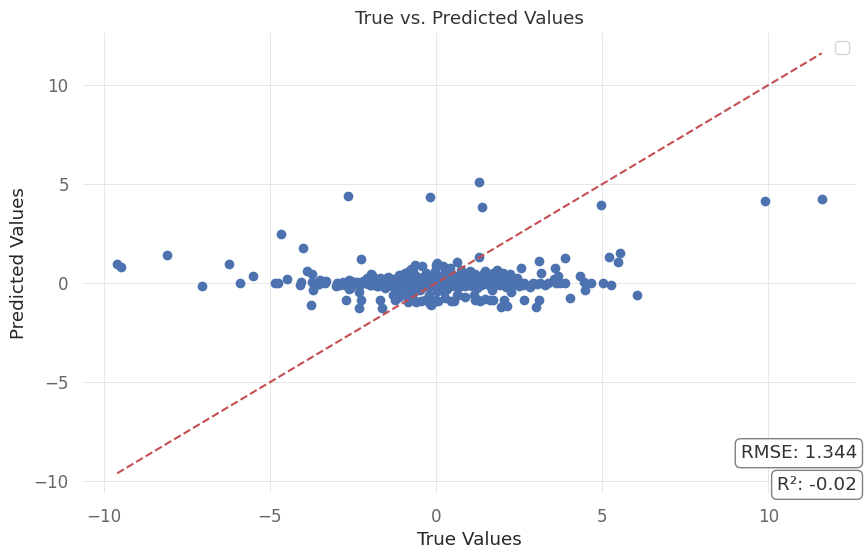

In [60]:
# Instantiating GradientBoostingRegressor model
model = GradientBoostingRegressor(random_state = 42)

# Fitting, testing, and computing scores
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared = False)

# Plotting scatter plot – y_test x y_pred
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs. Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
box = dict(boxstyle="round, pad=0.3", fc="white", ec="gray", lw=1)
plt.text(plt.xlim()[1], plt.ylim()[0]+0.02, f"R²: {r2:.2f}", ha='right', va='bottom', wrap = True, bbox = box)
plt.text(plt.xlim()[1], plt.ylim()[0]*0.85 + 0.02, f"RMSE: {rmse:.3f}", ha='right', va='bottom', wrap = True, bbox = box)

plt.legend()
plt.show()

In [62]:
# Daily returns plot y_pred x y_test
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(len(y_test)), y=y_test, mode='lines', name='True Values'))
fig.add_trace(go.Scatter(x=np.arange(len(y_test)), y=y_pred, mode='lines', name='Predicted Values'))
fig.update_layout(title='True vs. Predicted Values', xaxis_title='Index', yaxis_title='Values')
fig.show(renderer='colab')

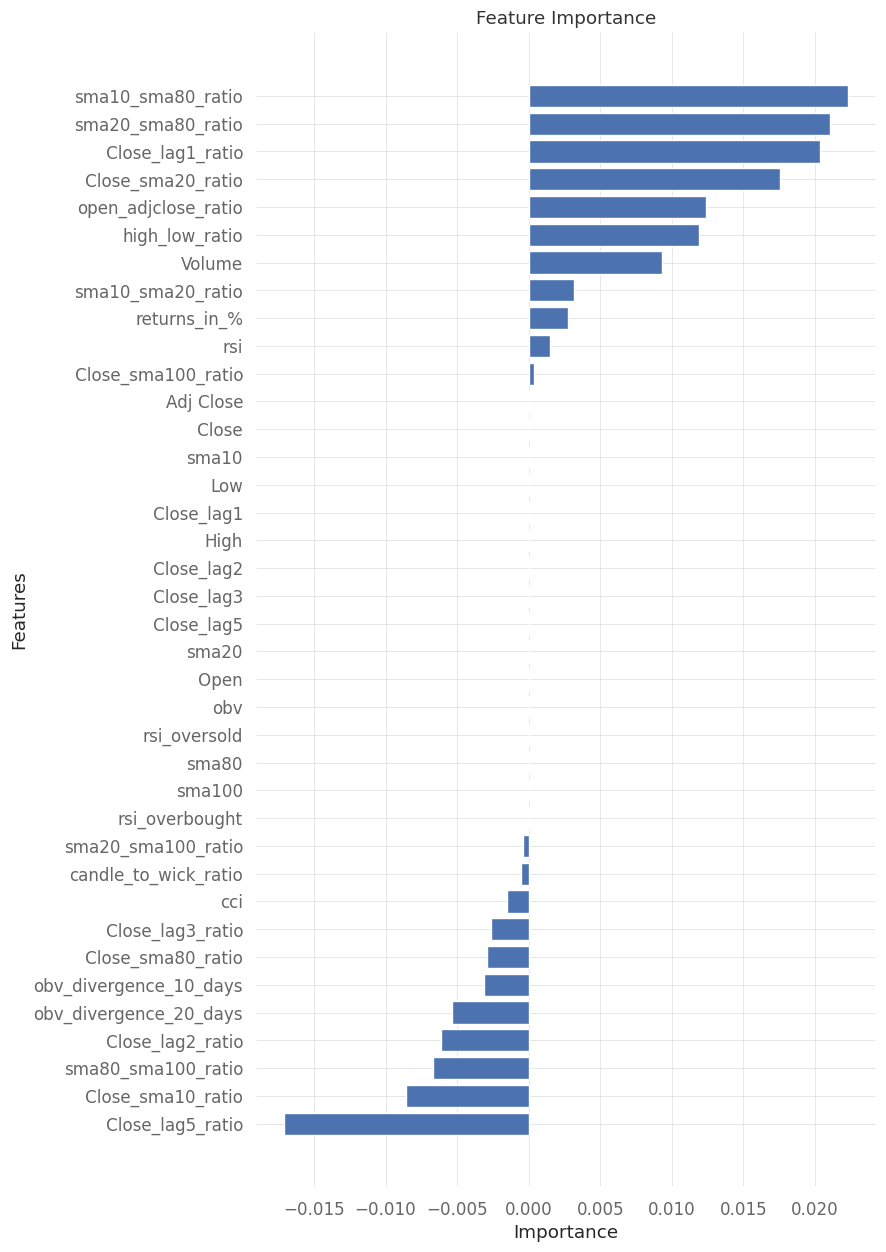

In [63]:
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42) # Computing feature importance

# Computing mean scores and obtaining features' names
importances = result.importances_mean
feature_names = X_test.columns

# Sorting Features importances and names
indices = importances.argsort()[::1]
sorted_features = feature_names[indices]
sorted_importances = importances[indices]

# Plotting Feature Importance plot
fig, ax = plt.subplots(figsize = (8,15))
ax.barh(sorted_features, sorted_importances)
ax.set_yticklabels(sorted_features)
ax.set_ylabel('Features')
ax.set_xlabel('Importance')
ax.set_title('Feature Importance')
plt.show()